<b> Importing The Required Libaries </b>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from scipy import stats


Understand The Data

Let's load in the dataset and display it

In [2]:
newyork_df = pd.read_csv('AB_NYC_2019.csv')
newyork_df.head(7)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0


In [5]:
newyork_df.shape

(48895, 16)

In [4]:
newyork_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Describe fuction is usefull for quite the number of things, but i would be using it to spot the existence of OUTLIERS. 
Yes if we look through the columns statistics, there are some odd numbers.

Look at the price column, if the 75 percentile is 175, How come the max is 10000? 

Something is definitely off.

Looking closely we can see that the columns "min nights", ""number of reviews", "reviews per month","calculated_host_listings" all have outliers.
That we would work on later.

In [3]:
newyork_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Prepare The Data

To ensure data integrity, lets check for the existence missing values. The .sum() sums up the missing values for each column and returns a value other than zero (0) if null values are found within the dataset.

In [6]:
#Checks for null values within the dataset per column and sums the number of missing values per row.
newyork_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We have quite the number of missing values in the following columns;  
- Name
- Host Name
- Last Review
- Reviews Per Month 

Thankfully we caught that.  


Let's address this missing values first.      
We can either do  the following                     
		- Drop Them                      
		- Replace Them                   
		- Commpute the missing value

We should drop the Last Review Column as that is not useful in this analysis process. (Drop Them)

In [7]:
newyork_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [8]:
newyork_df.drop(['last_review'],axis=1,inplace=True)
newyork_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


We have gotten rid of the Last Review Column.          
We are left with the 'Name', 'Host Name' , 'Reviews Per Month' column to figure out what to do.                    
Let's fill the missing values in ''Reviews per month' with 0, nobody gave them reviews for that period. (Commuting the missing values)

In [9]:
newyork_df['reviews_per_month'] = newyork_df['reviews_per_month'].fillna(0)
newyork_df.isnull().sum()


id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

We are left with just 'name' & 'host_name' columns.    
Let's fill the missing name and host_name with N/A

In [13]:
newyork_df.fillna({'name': 'N/A'}, inplace=True)
newyork_df.fillna({'host_name': 'N/A'}, inplace=True)
newyork_df.isnull().sum()
newyork_df.head(2)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


No more missing values.      
Let's drop the ID column we don't need it.


In [15]:
#newyork_df.drop(['id'],axis=1,inplace=True)
newyork_df.head(2)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


Great let's go ahead.

Outliers.                   
Checking for outliers within a dataset as this is also important.                   
That can be done with the describe function and looking out for any peculiarities.

In [12]:
newyork_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [16]:
newyork_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Notice the following

The minimum price is 0 so basically free??. Notice also that the max is 10000 while the 75 percentile is 175. That's very odd.             
Looking across the table above we see other columns that have this level of oddity within them.           
The columns include;                  
           -minimum_nights            
  		   -calculated_host_listings_count                
		   -reviews_per_month                      
		   -number_of_reviews                      
All these point that there may be outliers in these columns.                  
Let's investigate futher.                
One of the best ways to observe outliers within a dataset is through a boxplox.

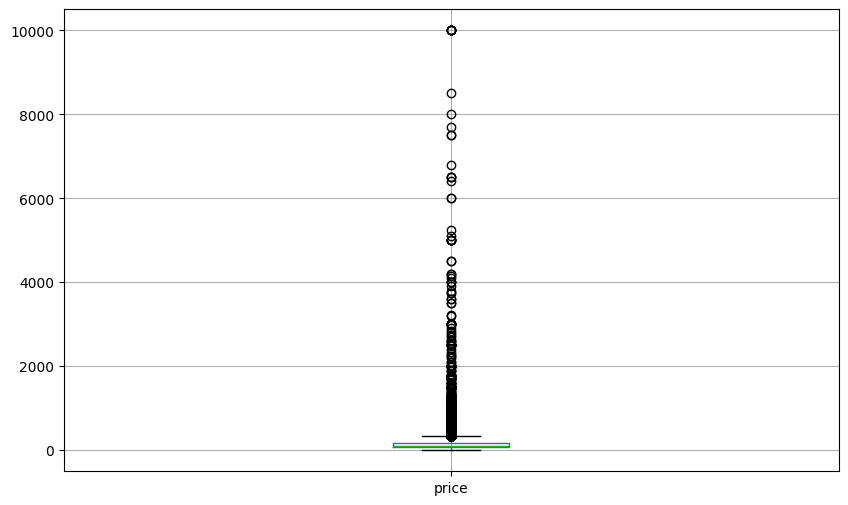

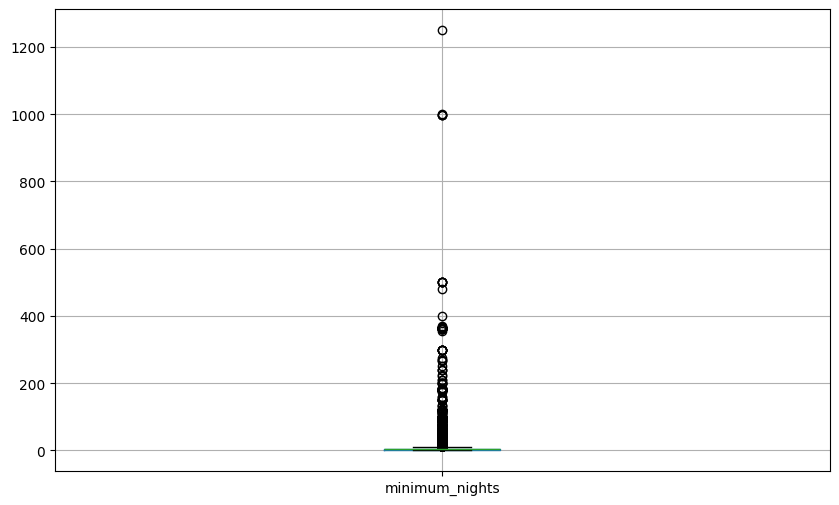

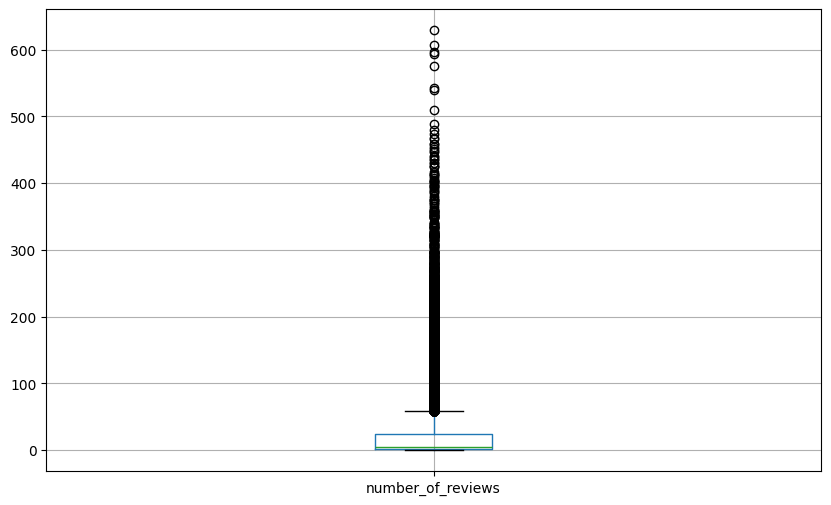

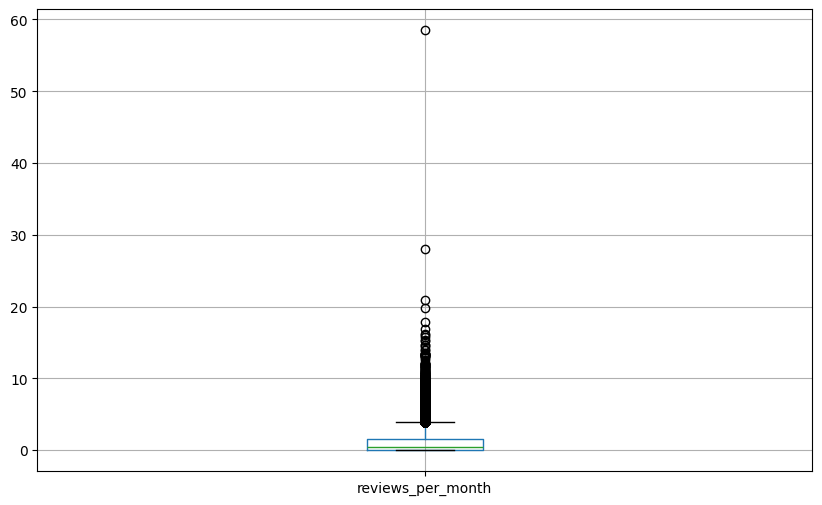

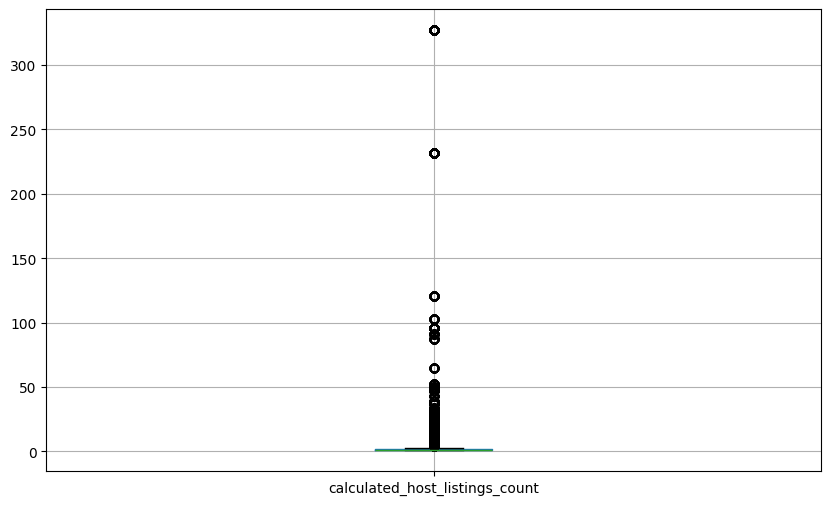

In [13]:
outlier_columns = [
    'price', 'minimum_nights', 'number_of_reviews', 
    'reviews_per_month', 'calculated_host_listings_count'
]
for col in outlier_columns:
    plt.figure(figsize=(10, 6))
    newyork_df.boxplot(col)
    plt.show()

While using the describe function is it is possible we misssed some outliers.                
Making use of a Z- score to narrow in on Outliers within this dataset.
A z-score tells you how many standard deviations away from the mean a particular data point is.                  
The further away from zero the z-score is, the more unusual (or "outlier") the data point is compared to the rest of the group.

latitude: 99
longitude: 1236
price: 388
minimum_nights: 327
number_of_reviews: 1221
reviews_per_month: 847
calculated_host_listings_count: 680
Outlier data extracted and stored in a separate DataFrame (outliers_df).


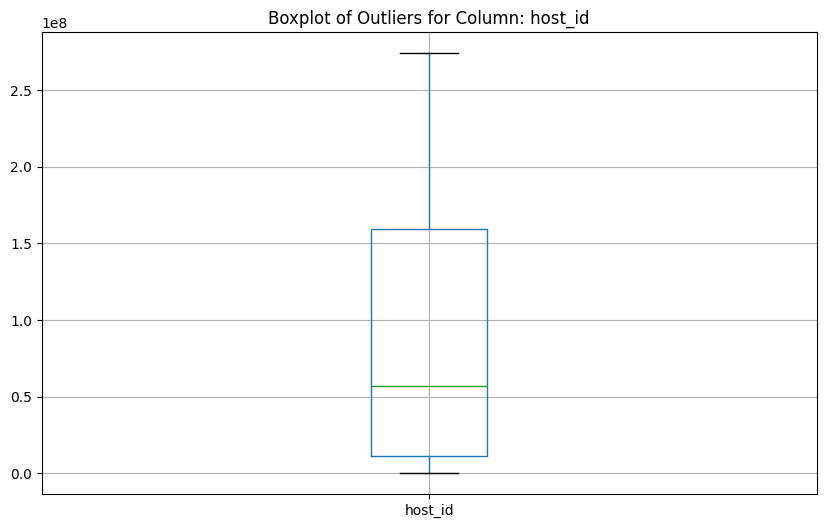

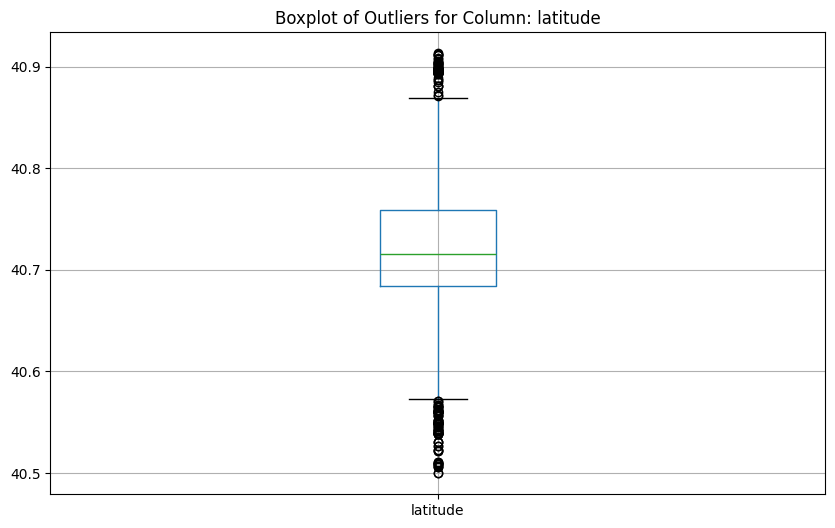

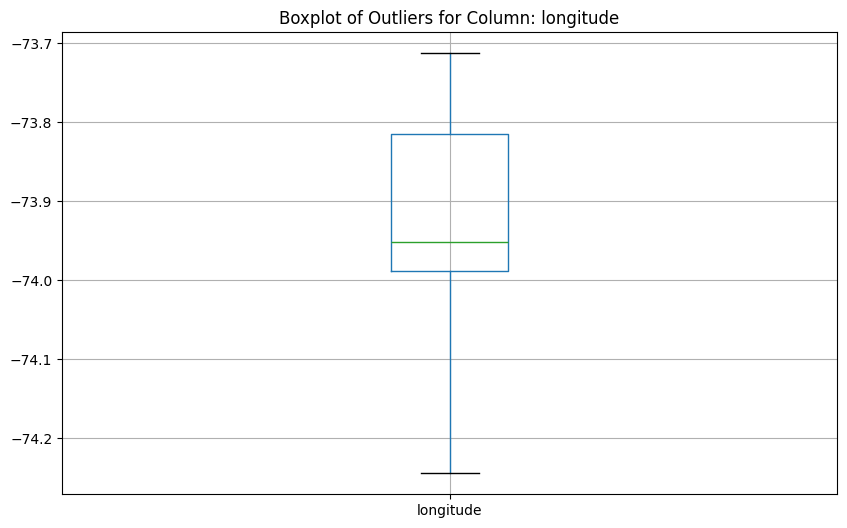

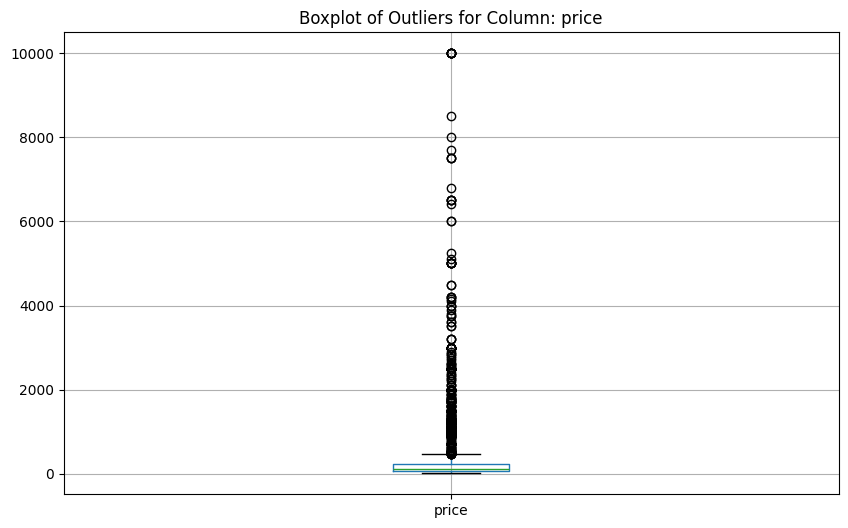

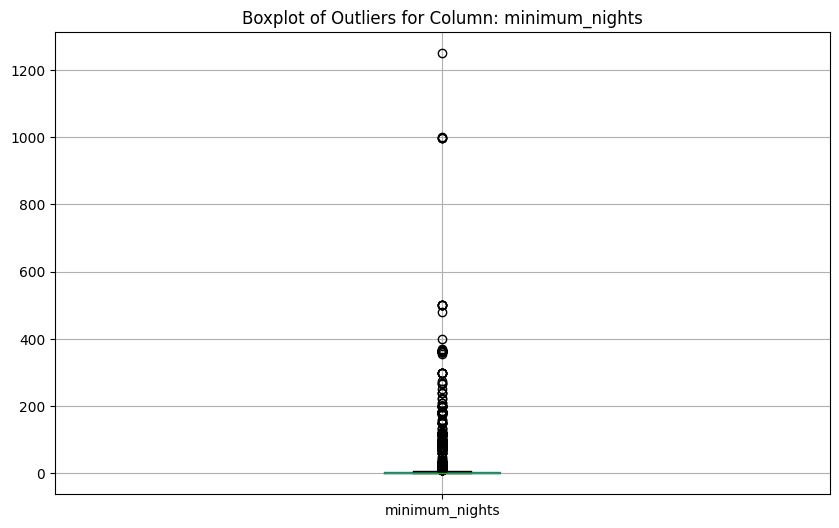

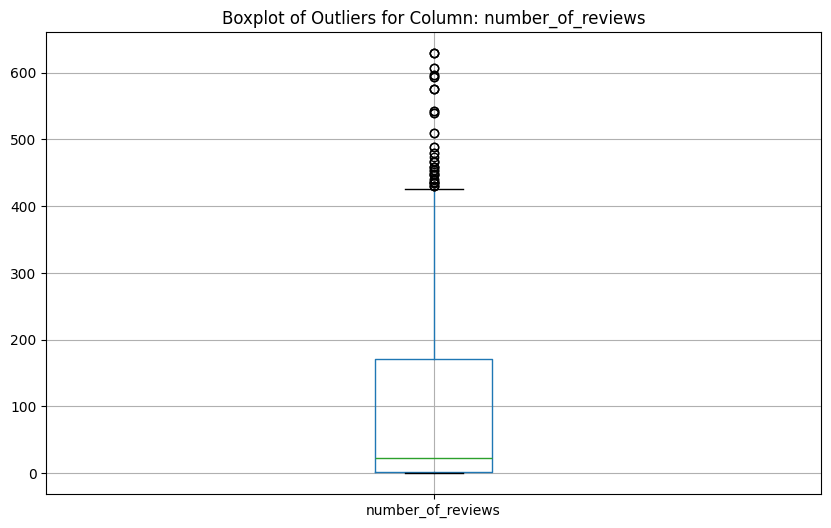

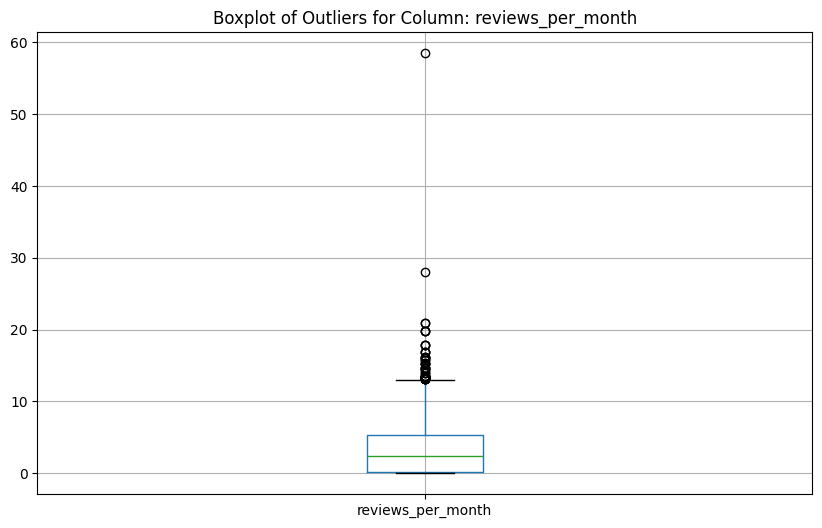

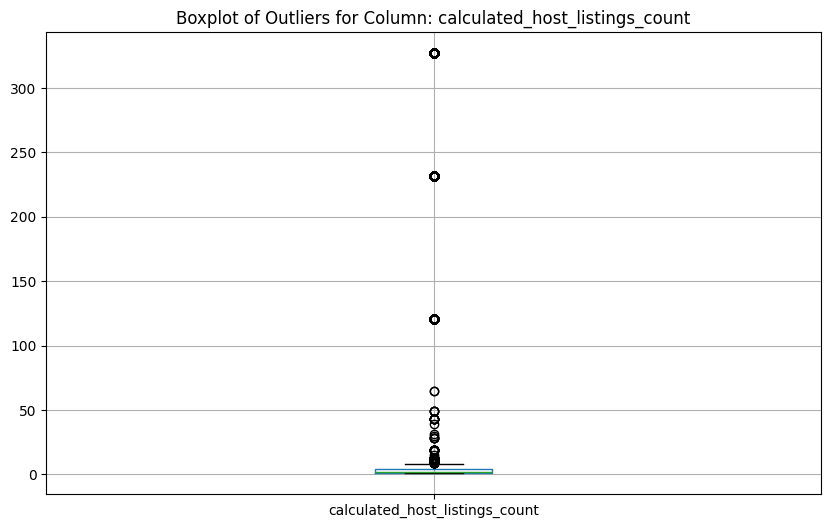

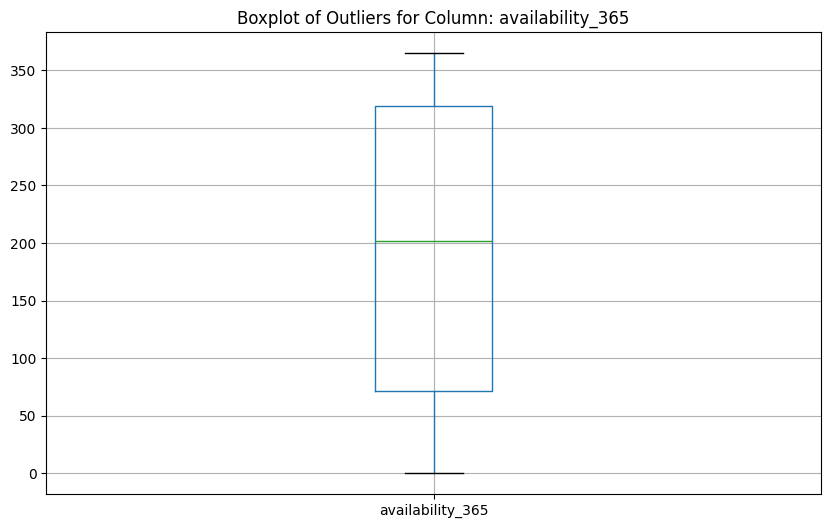

In [19]:
# Select numeric columns (assuming you want to focus on numeric outliers)
newyork_df_num = newyork_df.select_dtypes(include=[np.number])

# Define z-score threshold
threshold = 3

outliers_df = pd.DataFrame()

for col in newyork_df_num.columns:
    z_score = np.abs(stats.zscore(newyork_df_num[col]))

    outlier_indexes = np.where(z_score > threshold)[0]

    outlier_data = newyork_df_num.iloc[outlier_indexes]
    if not outlier_data.empty:
        outliers_df = pd.concat([outliers_df, outlier_data.copy()], ignore_index=True)

    outliers_num = len(np.where(z_score > threshold)[0])
    if outliers_num:
        print(f'{col}: {outliers_num}')

if outliers_df.empty:
    print("No outliers identified based on the chosen z-score threshold.")
else:
    print("Outlier data extracted and stored in a separate DataFrame (outliers_df).")

if not outliers_df.empty:
    outlier_columns = outliers_df.columns

    for col in outlier_columns:
        plt.figure(figsize=(10, 6))
        outliers_df.boxplot(column=col)
        plt.title(f"Boxplot of Outliers for Column: {col}")
        plt.show()

We see now that outliers exist within the following columns
latitude,
longitude,
price,
minimum_nights,
number_of_reviews,
reviews_per_month,
calculated_host_listings_count.


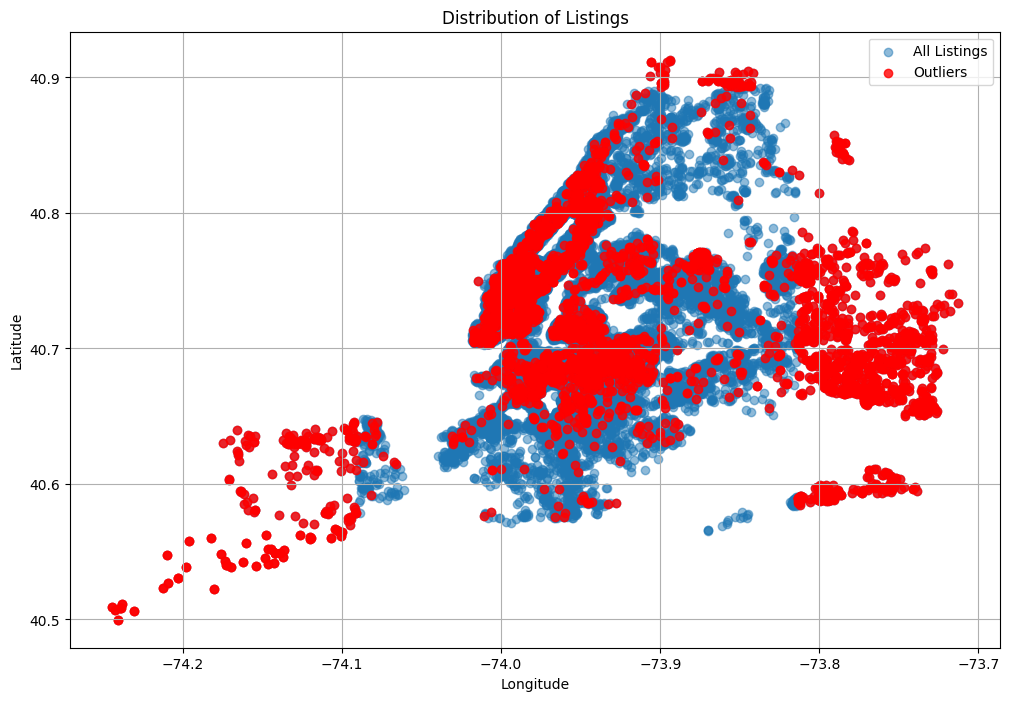

In [15]:
plt.figure(figsize=(12, 8))
plt.scatter(newyork_df['longitude'], newyork_df['latitude'], alpha=0.5, label='All Listings')
if not outliers_df.empty:
    latitude_outliers = outliers_df['latitude']
    longitude_outliers = outliers_df['longitude']
    plt.scatter(longitude_outliers, latitude_outliers, alpha=0.8, label='Outliers', c='red')
plt.title('Distribution of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

#Shows us the distibution of the outliers and all lisiting with respect to longtitude and latitude

Let's fill the missing input with values

In [44]:
# Fill missing values in numeric columns with their respective means
numeric_columns = newyork_df_num.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    mean_value = newyork_df[col].mean()
    newyork_df[col] = newyork_df[col].fillna(mean_value)

# Verify that there are no more missing values
newyork_df.isnull().sum()


name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

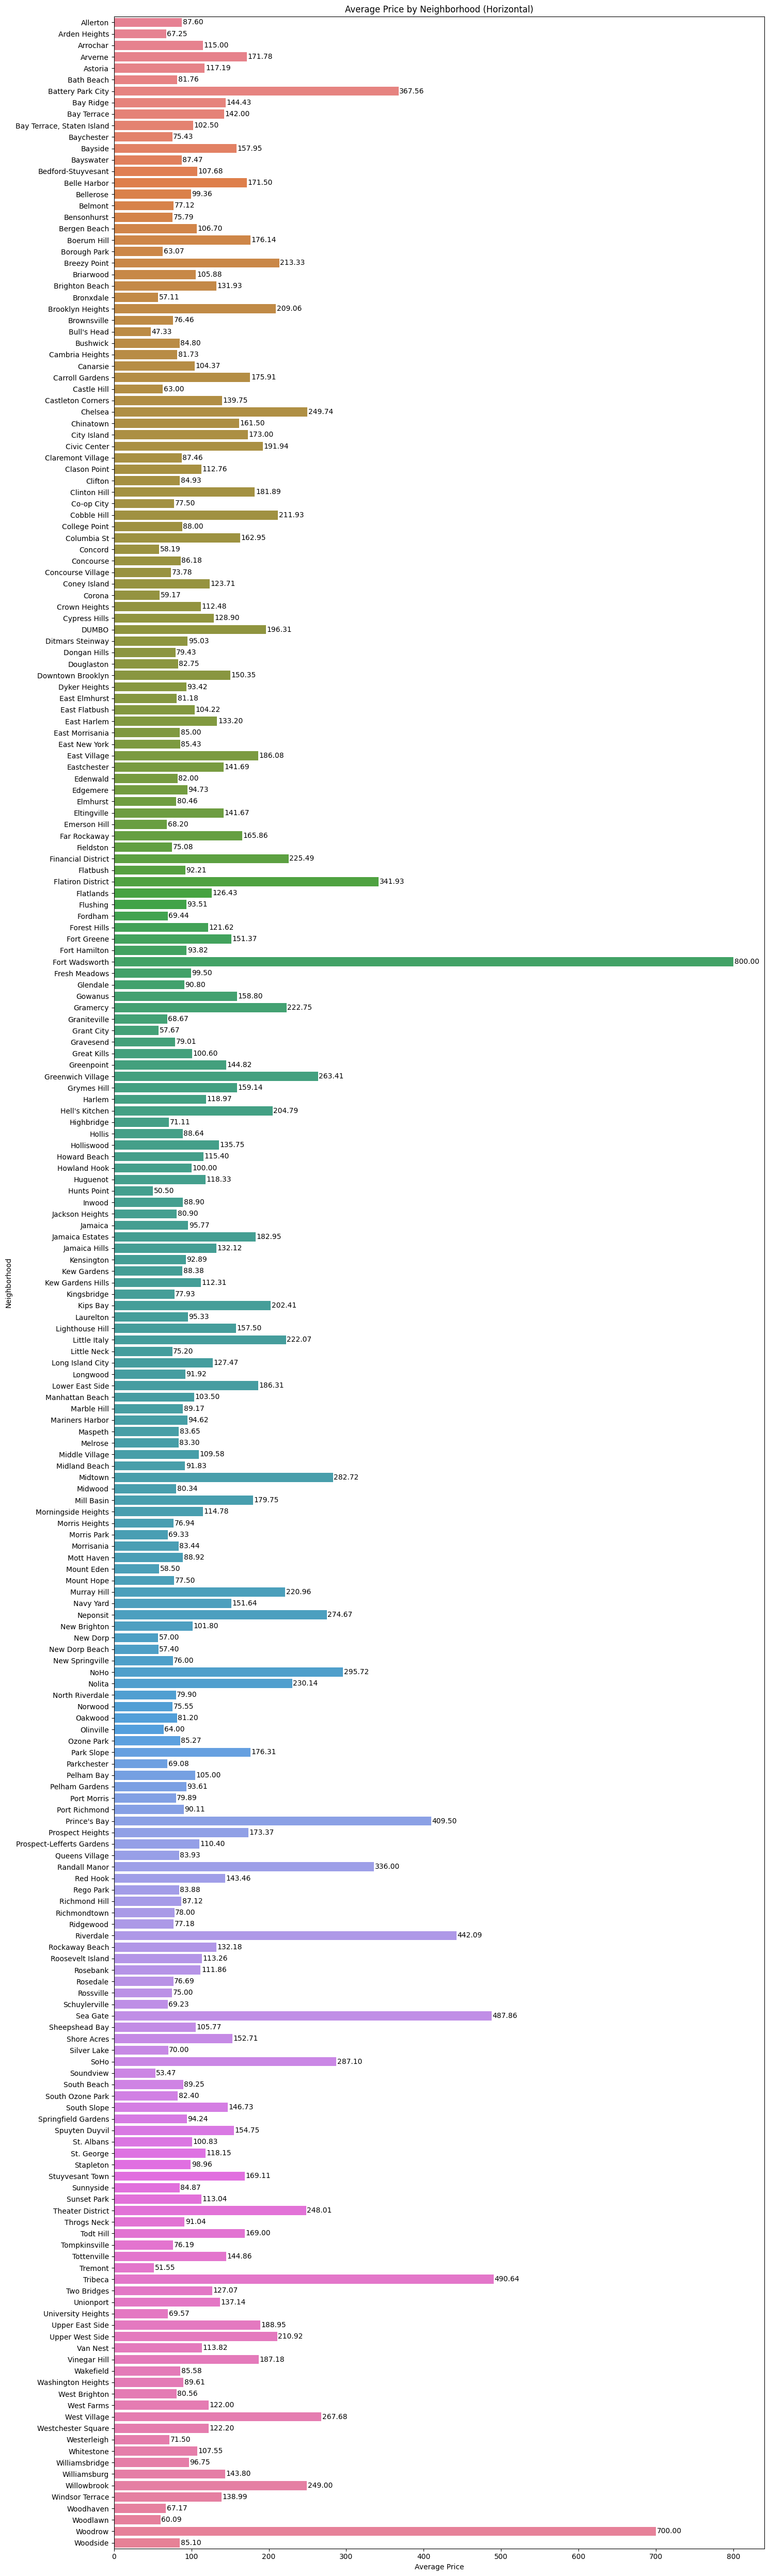

In [45]:
plt.figure(figsize=(15, 50)) 
bar_plot = sns.barplot(x='price', y='neighbourhood', data=average_price_per_neighborhood, hue='neighbourhood', dodge=False, legend=False)

# Add annotations
for p in bar_plot.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='left', va='center')

plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.title('Average Price by Neighborhood (Horizontal)')
plt.yticks(rotation=0)
plt.tight_layout() 
plt.show()
